In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

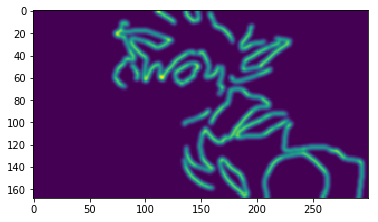

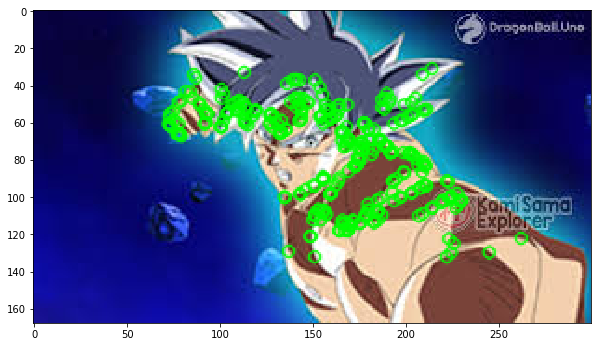

In [33]:
img1_color = cv2.imread('prueba2.jpeg')          # queryImage
img2_color = cv2.imread('completa.jpg') # trainImage

orb = cv2.ORB_create()

img1 = cv2.cvtColor(img1_color,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
#orb = cv2.ORB()

kernel_size = 9
low_t = 150;
high_t = 290;
blur_gray1 = cv2.GaussianBlur(img1,(kernel_size, kernel_size),0)
blur_gray2 = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges_frame1 = cv2.Canny(blur_gray1, low_t,high_t)
edges_frame2 = cv2.Canny(blur_gray2, low_t,high_t)
blur_gray1v2 = cv2.GaussianBlur(edges_frame1,(kernel_size, kernel_size),0)

plt.imshow(blur_gray1v2)


# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(edges_frame1, None)
kp2, des2 = orb.detectAndCompute(edges_frame2, None)


# draw only keypoints location,not size and orientation
img_points = cv2.drawKeypoints(img1_color,kp1,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_points, cv2.COLOR_BGR2RGB))
plt.show()



In [34]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img2 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img2, flags=2)
#print(len(matches))

if(len(matches) > 100 and len(matches) < 180):
    plt.figure(figsize=(15, 12))
    plt.imshow(img2)
    plt.show()
    print("Imagen encontrada")
else:
    print("Imagen NO encontrada")

Imagen NO encontrada
